In [1]:
import random
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import random
import math
import pandas as pd
import copy

# константы генетического алгоритма
POPULATION_SIZE = 300   # количество индивидуумов в популяции
P_CROSSOVER = 0.9       # вероятность скрещивания
P_MUTATION = 0.9        # вероятность мутации индивидуума
MAX_GENERATIONS = 20    # максимальное количество поколений

In [2]:
HISTORY = []
HISTORY2 = []

LAMDA0 = 0.00001
K = 50
v = 100
Time = 300
# (Т_огр)T0 = T_lim
T_lim = 150

e_1 = 4
e_1i = 2
e_tr = 6
e_tri = 2

{(0, 1): Text(0.5978040868787858, 0.45054159834784474, '1000'),
 (0, 2): Text(-0.3819353869249318, 0.3493083520134624, '200'),
 (1, 3): Text(0.24199663703881824, -0.37579426771743885, '200'),
 (2, 3): Text(-0.7377428367648993, -0.4770275140518212, '100'),
 (2, 4): Text(-0.447507041673064, -0.6147745057096603, '50'),
 (3, 5): Text(-0.45261254574313964, 0.04149140586472466, '100'),
 (3, 6): Text(0.1281026427133446, -0.054516194337913326, '100'),
 (4, 6): Text(0.41833843780517993, -0.19226318599575237, '200'),
 (4, 7): Text(0.39459837916848967, -0.9008378464164952, '50'),
 (5, 8): Text(-0.63721258249606, 0.6195869481162242, '50'),
 (6, 8): Text(-0.05649739403957582, 0.5235793479135862, '50'),
 (7, 8): Text(-0.08023745267626609, -0.18499531250715667, '50')}

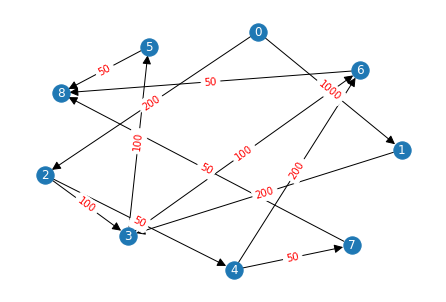

In [3]:
martx = [
[0, 1000, 200, 0, 0, 0, 0, 0, 0], 
[0, 0, 0, 200, 0, 0, 0, 0, 0], 
[0, 0, 0, 100, 50, 0, 0, 0, 0], 
[0, 0, 0, 0, 0, 100, 100, 0, 0], 
[0, 0, 0, 0, 0, 0, 200, 50, 0], 
[0, 0, 0, 0, 0, 0, 0, 0, 50], 
[0, 0, 0, 0, 0, 0, 0, 0, 50], 
[0, 0, 0, 0, 0, 0, 0, 0, 50], 
[0, 0, 0, 0, 0, 0, 0, 0, 0], 
] 

tasks_graph = nx.DiGraph(np.array(martx))
task_weight = [100, 500, 500, 300, 100, 300, 200, 100, 100]

options = {
    'width': 1,
    'arrowstyle': '-|>',
    'arrowsize': 18,
}

pos = nx.spring_layout(tasks_graph, k=150,seed=20)
nx.draw(tasks_graph, pos, with_labels=True, font_color='white', **options)
nx.draw_networkx_edge_labels(tasks_graph, pos, {(x, y): z['weight'] for (x, y, z) in nx.to_edgelist(tasks_graph)},font_color='red')

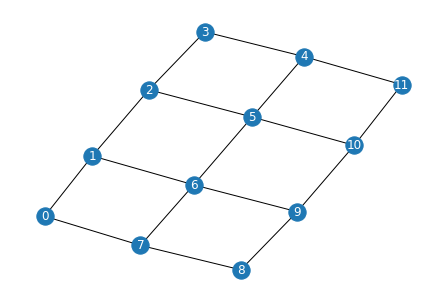

In [4]:
martx = [[0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], 
[1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0], 
[0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0], 
[0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0], 
[0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1], 
[0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0], 
[0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0], 
[1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0], 
[0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0], 
[0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0], 
[0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1], 
[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0]]

network_graph = nx.Graph(np.array(martx))

net_power = [300,300,300,300,300,300,300,300,300,300,300,300]
epsi = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

E0 = [10,10,10,10,10,10,10,10,10,10,10,10]
EMax = [100,100,100,100,100,100,100,100,100,100,100,100]

pos = nx.spring_layout(network_graph, seed=100)
nx.draw(network_graph, pos, with_labels=True, font_color='white')

In [5]:
print(nx.to_dict_of_lists(network_graph))

{0: [1, 7], 1: [0, 2, 6], 2: [1, 3, 5], 3: [2, 4], 4: [3, 5, 11], 5: [2, 4, 6, 10], 6: [1, 5, 7, 9], 7: [0, 6, 8], 8: [7, 9], 9: [6, 8, 10], 10: [5, 9, 11], 11: [4, 10]}


In [6]:
def FLamda(D):
    return LAMDA0 * 2 ** (K * D / 10)


def P(lamda):
    return math.exp(-lamda * Time)


def probabilityOfUptime(p, epsi):
    res = 1
    for i in range(len(p)):
        if p[i] > 0:
            res *= p[i] ** epsi[i]
    return res

In [7]:
def node_from_distribution(distribution, node):
        for i in range(len(distribution)):
            if node in distribution[i]:
                return i

In [8]:
class Individual():
    def __init__(self, *args):
        super().__init__(*args)
        self.convolution = 0
        self.f = 0
        self.Z = 100000000
        self.E = []
        self.W = []
        self.T_task = 0
        self.T_NET = 0
        self.distribution = []
        self.short_path = []

    def __str__(self):
        return f'''Cвертка : {self.convolution},\n 
ВБР: {self.p0}, Энергопотребление : {self.Z},\n 
Распределение: {self.distribution}, \n
Нагруженность на узлы: {self.W}, \n
Производительность узлов: {net_power}\n
трудоемкость задач: {task_weight}\n
D {self.D}\n
Сколько времени уделено задаче (T_task) {self.T_task}\n
Сколько времени работает узел (T_NET) {self.T_NET} \n
Энергопотребление на каждый узел (Ei) : {self.E}
Кратчайший путь (short_path) {self.short_path}\n
# Сколько каждый узел должен обработать задач \n
{self.v_task_to_node}\n
# Сколько каждый узел должен отправить\n
{self.v_sent_to_node} \n
# Сколько каждый узел должен принять \n
{self.v_reseive_to_node}\n
'Задача1задача2:ПутьВГрафеСети {self.paths}' \n\n\n '''

    def set_distribution(self, distr):
        self.distribution = distr
        self.create_paths()
        self.calculation_of_parameters()

    def create_paths(self):
        # 'Задача1задача2:ПутьВГрафеСети'
        self.paths = {}
        # Словарь путей
        # Задача:Узел
        self.relationship = {}
        for start, end, weight in nx.to_edgelist(tasks_graph):
            self.relationship[start] = node_from_distribution(self.distribution, start)
            self.relationship[end] = node_from_distribution(self.distribution,end)
            if self.relationship[start] == self.relationship[end]:
                self.paths[str(start) + str(end)] = [self.relationship[start]]
            else:
                self.paths[str(start) + str(end)] = random.choice(
                    [item for item in nx.all_shortest_paths(network_graph, self.relationship[start], self.relationship[end])])


    def calculation_of_parameters(self): 
        # Подсчет трудоемкости
        W = [0 for _ in range(len(net_power))]

        # Сколько каждый узел должен обработать задач 
        self.v_task_to_node = [0 for _ in range(len(net_power))]
        # Сколько каждый узел должен отправить
        self.v_sent_to_node = [0 for _ in range(len(net_power))]
        # Сколько каждый узел должен принять 
        self.v_reseive_to_node = [0 for _ in range(len(net_power))]

        for start, end, weight in nx.to_edgelist(tasks_graph):
            """
            start - задача начало
            end - задача конец
            weight - то сколько должено быть прередано из одной задачи в другую 
            """
            if not len(self.paths[str(start) + str(end)]) == 1:
                temp = self.paths[str(start) + str(end)].copy()
                # task_weight - нагрузка на выполнение задачи 
                #Оброботка нагрузки начала пути 
                W[temp[0]] += task_weight[start] + weight['weight']

                self.v_sent_to_node[temp[0]] += weight['weight']
                self.v_task_to_node[temp[0]] += task_weight[start]
                #Оброботка нагрузки конца пути
                W[temp[-1]] += task_weight[end] + weight['weight']

                self.v_reseive_to_node[temp[-1]] += weight['weight']
                self.v_task_to_node[temp[-1]] += task_weight[start]

                temp.pop(0)
                temp.pop(-1)
                # Оброботка нагрузки всех остальных узлов в пути
                for i in temp:
                    W[i] += 2 * weight['weight']
                    self.v_sent_to_node[i] += weight['weight']
                    self.v_reseive_to_node[i] += weight['weight']
            else:
                W[self.relationship[start]] += task_weight[start]
                self.v_task_to_node[self.relationship[start]] += task_weight[start]

                W[self.relationship[end]] += task_weight[end]
                self.v_task_to_node[self.relationship[end]] += task_weight[end]

        # Оценка времени задач изначально
        arr = ([a for a in nx.all_simple_paths(tasks_graph, 0, len(task_weight) - 1)])
        arr.sort(key=lambda x: len(x), reverse=True)
        T_task = [0 for _ in range(len(task_weight))]

        for task in arr[0]:
            T_task[task] = T_lim / len(arr[0])

        # Оценка времени задач
        for path_task in arr[1:]:
            sum_t = 0
            temp = []
            for task in path_task:
                if T_task[task] == 0:
                    temp.append(task)
                sum_t += T_task[task]
            for task in temp:
                T_task[task] = (T_lim - sum_t) / len(temp)

        T_NET = [0 for _ in range(len(net_power))]
        # Оценка времени сети
        for start, end, weight in nx.to_edgelist(tasks_graph):
            path_net = self.paths[str(start) + str(end)].copy()
            if len(path_net) == 1:
                if T_NET[path_net[-1]] == 0:
                    T_NET[path_net[-1]] = min(T_task[end], T_task[start])
                else:
                    T_NET[path_net[-1]] = min(T_task[end], T_task[start], T_NET[path_net[-1]])
            else:
                # Обработка поледего узла в пути
                if T_NET[path_net[-1]] == 0:
                    T_NET[path_net[-1]] = T_task[end]
                else:
                    T_NET[path_net[-1]] = min(T_task[end], T_NET[path_net[-1]])
                # Если будет > 1 узла то
                for node in path_net[:-1]:
                    if T_NET[node] == 0:
                        T_NET[node] = T_task[start] / len(path_net[:-1])
                    else:
                        T_NET[node] = min(T_NET[node], T_task[start] / len(path_net[:-1]))
            
            D = [0. for i in range(len(net_power))]

            for i in range(len(net_power)):
                if not T_NET[i] == 0:
                    D[i] = W[i] / (net_power[i] * T_NET[i])

        # Оценка кр. пути задач для сети
        special_t = T_lim / len(arr[0])
        for node in range(len(net_power)):
            if len(set(self.distribution[node]) & set(arr[0])) > 1:
                T_NET[node] = special_t * len(set(self.distribution[node]) & set(arr[0]))
        flag = True
        for d in D:
            if d > 1:
                flag = False
        
        if flag:
            lamda = [FLamda(D[i]) for i in range(len(net_power))]
            p = [P(L) for L in lamda]
            p0 = probabilityOfUptime(p, epsi)
        else:
            p0 = -1

        #Вычислительного устройства(ВУ). computing devices - cd
        #E_cd = [0 for _ in range(len(net_power))]
        #Устройства передачи данных (УПД). data transmission devices - dtd
        #E_dtd = [0 for _ in range(len(net_power))]
        #
        #for i in range(len(net_power)):
        #    E_cd[i] = e_1 * (self.v_task_to_node[i]/net_power[i]) + e_1 * (self.v_reseive_to_node[i]/net_power[i]) + e_1 * (self.v_sent_to_node[i]/net_power[i]) - e_1i*(T_lim - (self.v_task_to_node[i]/net_power[i]) +  (self.v_reseive_to_node[i]/net_power[i]) + (self.v_sent_to_node[i]/net_power[i]))
        #for i in range(len(net_power)):
        #    E_dtd[i] = e_tr * (self.v_reseive_to_node[i]/v) + e_tr * (self.v_sent_to_node[i]/v) + e_tri * (T_lim - (self.v_reseive_to_node[i]+self.v_sent_to_node[i])/v)
        #
        #if flag: 
        #    E = sum(E_cd) + sum(E_dtd)
        #else:
        #    E = 10000000000

        if flag:
            E = [0 for _ in range(len(net_power))] 
            Z = [0 for _ in range(len(net_power))] 
            for i in range(len(net_power)):
                E[i] = E0[i] + (EMax[i] - E0[i]) * D[i]
                Z[i] = E[i]*T_NET[i] + (T_lim - T_NET[i])* E0[i]
            
            Z = sum(Z)
        else:
            E = []
            Z = 10000000000

        convolution = p0 * (1/Z)

        self.convolution = round(convolution * 10 ** 6, 5)
        self.p0 = p0
        self.Z = Z
        self.E = E
        self.W = W
        self.D = D
        self.T_task = T_task
        self.T_NET = T_NET
        self.short_path = arr[0]
    
    def __eq__(self, other):
        c0 = 0
        for node in range(len(net_power)):
            c = 0
            for task in self.distribution[node]:
                if task in other.distribution[node]:
                    c +=1
            if c == len(self.distribution[node]):
                c0 +=1
        
        if c0 == len(net_power):
            return True

        return False

In [9]:
def create_random_distribution(COUNT_NODE_NET, COUNT_NODE_TASK, CONST_DISTRIBUTION={0:0}):
    random_task_distribution = [[] for _ in range(COUNT_NODE_NET)]
    temp = [x for x in range(COUNT_NODE_TASK)]
    for node, task in CONST_DISTRIBUTION.items():
        random_task_distribution[node].append(temp.pop(task))
    while not len(temp) == 0:
        random_task_distribution[random.randint(0, COUNT_NODE_NET - 1)].append(
            temp.pop(random.randint(0, len(temp) - 1)))
    return random_task_distribution

In [10]:
def individualCreator():
    temp = Individual()
    dist = create_random_distribution(len(net_power), len(task_weight))
    temp.set_distribution(dist)
    return temp

In [11]:
def newValueGenerator(distribution, net):
    dictOfLists = nx.to_dict_of_lists(net)
    newDistribution = [[] for _ in range(len(net_power))]
    #У каких задач меняем распределение
    new_distr = random.choices(range(len(task_weight)), k=random.randint(1,len(task_weight)))
    for task in range(len(task_weight)):
        node = node_from_distribution(distribution, task)
        if task in new_distr:
            newDistribution[random.choice(dictOfLists[node])].append(task)
        else:
            newDistribution[node].append(task)

    return newDistribution

In [12]:
def newValueGeneratorT(distribution, net, T):
    dictOfLists = nx.to_dict_of_lists(net)
    newDistribution = [[] for _ in range(len(net_power))]
    #У каких задач меняем распределение random.randint(1,len(task_weight))
    new_distr = random.choices(range(len(task_weight)), k=2)
    for task in range(len(task_weight)):
        node = node_from_distribution(distribution, task)
        if task in new_distr:
            newDistribution[random.choice(dictOfLists[node])].append(task)
        else:
            newDistribution[node].append(task)

    return newDistribution

In [13]:
def random_search():
    RES_ = individualCreator()
    HISTORY = []

    for _ in range(10_000):
        if RES_.p0 > 0:
            x = newValueGenerator(RES_.distribution, network_graph)
            new_y = Individual()
            new_y.set_distribution(x)
        else:
            new_y = individualCreator()

            
        if new_y.convolution > RES_.convolution:
            RES_ = new_y
        if not new_y.convolution == -1:
            HISTORY.append(new_y)
    return RES_, HISTORY

In [14]:
def main():
    print("T огр = ", T_lim)
    print("t = ", Time)

    print("Энергопотребление при отсутствии загруженности (E0) = ", E0)
    print("Энергопотребление при максимальной загруженности (EMax) = ", EMax)

    HISTORY = []
    while len(HISTORY) < 4: 
        RES_ , HISTORY = random_search()

    print("---------------------------")
    print(1,' решение')
    print(HISTORY[0])
    print("---------------------------")
    print("После оптимизации")
    print(RES_)
    print("---------------------------")

In [15]:
RANDOM_SEED = 488204665213841
random.seed(RANDOM_SEED)
main()


T огр =  150
t =  300
Энергопотребление при отсутствии загруженности (E0) =  [10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]
Энергопотребление при максимальной загруженности (EMax) =  [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
---------------------------
1  решение
Cвертка : -0.0001,
 
ВБР: -1, Энергопотребление : 10000000000,
 
Распределение: [[0, 3], [1], [2, 6], [4], [], [], [], [8], [], [7, 5], [], []], 

Нагруженность на узлы: [3100, 3200, 2900, 600, 0, 200, 500, 450, 100, 1050, 0, 0], 

Производительность узлов: [300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300]

трудоемкость задач: [100, 500, 500, 300, 100, 300, 200, 100, 100]

D [1.0333333333333334, 1.0666666666666667, 1.288888888888889, 0.26666666666666666, 0.0, 0.08888888888888889, 0.2222222222222222, 0.05, 0.022222222222222223, 0.23333333333333334, 0.0, 0.0]

Сколько времени уделено задаче (T_task) [30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0]

Сколько времени работает узел (T_NET) [60.0

In [16]:
def cooling_func(T):
    return 0.99 * T

def simulated_annealing(eval_func, perturb_func, T, cooling_func, max_iter):
    state = individualCreator()
    while T > 0:
        T = cooling_func(T)

        x = newValueGenerator(state.distribution, network_graph)
        new_state = Individual()
        new_state.set_distribution(x)

        if delta_eval < 0 or random.random() < math.exp(-delta_eval / T):
            state = new_state
            
            if state_eval < best_eval:
                best_state = state
                best_eval = state_eval

    return best_state, best_eval

In [17]:
initial_temp = 10
final_temp = 0.1

initial_state = individualCreator()

alpha = 0.001
current_temp = initial_temp
current_state = initial_state
res = initial_state


def T(T,k):
    return initial_temp * math.exp(-k**(3/len(task_weight)))

k=1


while current_temp >= final_temp:
    new_state = Individual()
    x = newValueGenerator(current_state.distribution, network_graph)
    new_state.set_distribution(x)

    cost_diff = current_state.convolution - new_state.convolution
    if cost_diff<0:
        current_state = new_state 
    elif random.uniform(0, 1) < math.exp(-1 * cost_diff / current_temp):
	    current_state = new_state
    
    current_temp = T(current_temp,k)
    k+=1

print(current_state)

Cвертка : 43.3649,
 
ВБР: 0.9184686346559262, Энергопотребление : 21180.0,
 
Распределение: [[5], [3], [8], [1], [0], [2, 7], [4, 6], [], [], [], [], []], 

Нагруженность на узлы: [750, 1800, 850, 2200, 1400, 2250, 1350, 0, 0, 0, 0, 0], 

Производительность узлов: [300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300]

трудоемкость задач: [100, 500, 500, 300, 100, 300, 200, 100, 100]

D [0.16666666666666666, 0.4, 0.18888888888888888, 0.4888888888888889, 0.15555555555555556, 0.5, 0.3, 0.0, 0.0, 0.0, 0.0, 0.0]

Сколько времени уделено задаче (T_task) [30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0]

Сколько времени работает узел (T_NET) [15.0, 15.0, 15.0, 15.0, 30.0, 15.0, 15.0, 0, 0, 0, 0, 0] 

Энергопотребление на каждый узел (Ei) : [25.0, 46.0, 27.0, 54.0, 24.0, 55.0, 37.0, 10.0, 10.0, 10.0, 10.0, 10.0]
Кратчайший путь (short_path) [0, 1, 3, 5, 8]

# Сколько каждый узел должен обработать задач 

[600, 1600, 600, 600, 200, 1300, 1400, 0, 0, 0, 0, 0]

# Сколько каждый узел д